# Iris Flower Classification Tutorial

Many coders jump straight into using machine learning frameworks (PyTorch, TensorFlow, Keras, Theano) without understanding what's happening "under the hood". Nowadays, it's hard to even find the infamous Iris Classification solved without using such tools. It's important we take the time to understand neural network fundamentals.

That's why in this project, I hand-coded a deep learning model using a neural network to identify each species of Iris. The network is a **multilayer perceptron** with one hidden layer (two neurons), coded with Python, and 100% accuracy. In this tutorial, I'll talk about the basic steps:

- importing libraries
- preprocessing
- data visualization
- building the model
- discussion of results 

Before starting, follow instructions on the [README](README.md) to install Python and all the necessary libraries. This tutorial is meant for complete NN beginners who have basic Python skills.

## Import the necessary AI libraries:

<a id = "pre"> </a>

In [1]:
import numpy as np # linear algebra and provides computational functions
import matplotlib.pyplot as plt # enables plots to be shown and other plotting functions
import pandas as pd # we will use this for data input and some preprocessing
import seaborn as sns # data visualization

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

For now, understand the first four libraries:
- **NumPy** is essential for performing the computational mathematical functions responsible for building the model: dot products, randomizing initial values, outer multiplication, etc
- **matplotlib.pyplot** allows us to plot relationships between different variables. In our project, it is primarily used to just show plots generated by other, stronger libraries
- **pandas** enables data input from csv files, or other file types. It is also helpful for some preprocessing. Who doesn't like pandas!
- **seaborn** is a very powerful statistical data visualization tool based on matplotlib. It provides high-level interfaces suited for plotting structures such as neural networks

We can worry about the scikit-learn libraries later as they come up. However, we will **not** be using sklearn to build the model.

## Preprocessing Data:
Preprocessing data is crucial for deep learning and neural networks. Data preprocessing involves various steps to clean, format, and prepare data for the training process. Imagine preprocessing data as setting up the stage for the neural network. Before sushi is served, the bones have to be removed, and the fish has to be gutted and sliced. In our case, the data is the fish, and the sushi is the results of our trained model.

### Data Input and Pre-checks

First, by using the pandas library, load and describe the data to get a grasp of what you're working with:


In [52]:
data = pd.read_csv('IRIS.csv')
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<br>
So we can see the total count is 150, and there's four inputs. Describing data is common practice for viewing statistics. Next, run a value count to check how balanced the data set is:

In [53]:
data["species"].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

<br>
Nice! It's already balanced for us. Now check for missing or invalid values:

In [54]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<br>
Perfect! Now let's check for any duplicates:

In [55]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

<br>
As you can tell, pandas is useful for preprocessing because it allows us to see any deficiencies in the data set right away. In our case, the Iris data set is already suited nicely for us to work with. Now lets encode, split train, and standardize the data.

### Encoding Data

By splitting up the inputs and outputs, we can prepare the training process. First, we'll assign the variable 'X' to all the sepal and petal data by dropping the last column containing the species names. On the other hand, we will also assign the variable 'y' to only the species name data.

In [56]:
#Assigning data values to split test later
X = data.drop(['species'], axis=1)
y = data['species']

<br>
Next, let's encode the data. This is important because we need to convert the data into a form that is trainable. In our case, the petal and sepal data are numerical values, but the Iris species data is stored as strings. Therefore, we need to convert the species names to numeric values: 0s, 1s, and 2s. The 0s will represent Setosa, the 1s for Versicolor, and 2s for Virginica. For this, we will use:

**from sklearn.preprocessing import LabelEncoder**

Below, I printed the values for demonstration:

In [67]:
# Encode labels and one-hot encode targets
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
print(y_encoded)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


<br>
- LabelEncoder() is used to transform the strings into numerical values. We then use fit_transform to use the standard deviation to scale that data

<br>

We aren't done yet! To get our data suited for machine learning, we still need to hot encode our numeric labels. This step is essential for many neural network algorithms. In the case of the Iris Flower Classification, we need to encode the 0s, 1s, and 2s, into vectors. Here we will use:

**from sklearn.preprocessing import OneHotEncoder**

In [82]:
onehot_encoder = OneHotEncoder(sparse_output=False)
y_onehot = onehot_encoder.fit_transform(y_encoded.reshape(-1, 1))
print(y_onehot[3],y_onehot[50],y_onehot[100])

[1. 0. 0.] [0. 1. 0.] [0. 0. 1.]


### Splitting data

To re-iterate, we transformed our species names (Iris Setosa, Iris Virginica, and Iris Versicolor) which were originally strings, to 0s, 1s, and 2s.
Then we transformed those 0s, 1s, and 2s into [1, 0, 0], [0, 1, 0], and [0, 0, 1].

This was necessary because the output layer of our multilayer perceptron contains three neurons. Now that our output data is suitable for training, we can split the data into training and testing sets.

In [70]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

Neural networks not only need data to train, but to also test. Here is where we use: **from sklearn.model_selection import train_test_split**

To use train_test_split, we input our encoded X and y values from earlier. The magic of this function lies within the third and fourth parameters:
- *test_size* determines the ratio of the data being split between training and testing. Here, we set it to 0.2, meaning 80% of our data is used to train the deep learning model, and 20% is used to test the performance of that trained model. For our Iris Flower Classification, this means 120 entrees are used for training, and 30 are used for testing.
- *random_state* ensures our split is reproducible. This means every time we run the code, the exact same split will happen every time. This is essential for training so we don't get any discrepancies.

### Standardize Features
<a id = "data"> </a>
Here we will use: **from sklearn.preprocessing import StandardScaler**

In [ ]:

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Standardizing features is crucial for the neural network because it ensures every feature has equal contribution to the model. Additionally, it helps the model converge faster, which speeds up the gradient descent process and improves performance.

- for X_train, we apply a fit_transform to scale the training data while still keeping its dimensions by using its standard deviation and mean. This prevents data leakage because it ensures testing data is not used to train the model.

- for X_test, we only apply a regular transform, because if we used a fit_transform, the testing data would be scaled using its own standard deviation, but we want to scale the testing data using the training data's standard deviation. Since sklearn keeps track of the fitted data, we can just use .transform(X_test).

## Visualizing the Data

Looks like we can proceed! Visualizing data is very crucial to building a neural network because it tells a story. It highlights trends and outliers, while also removing noise from data and highlighting important information. We will go over three common plots/graphs.

### Pair Plot

Now lets visualize the data using a **pair plot**. For this we'll use the seaborn and matplotlib.pyplot functions. This graph visualizes the relationship between each pair of variables in the Iris data set. Since there are four inputs, you will notice the plot becomes a 4x4 with 16 plots in total.

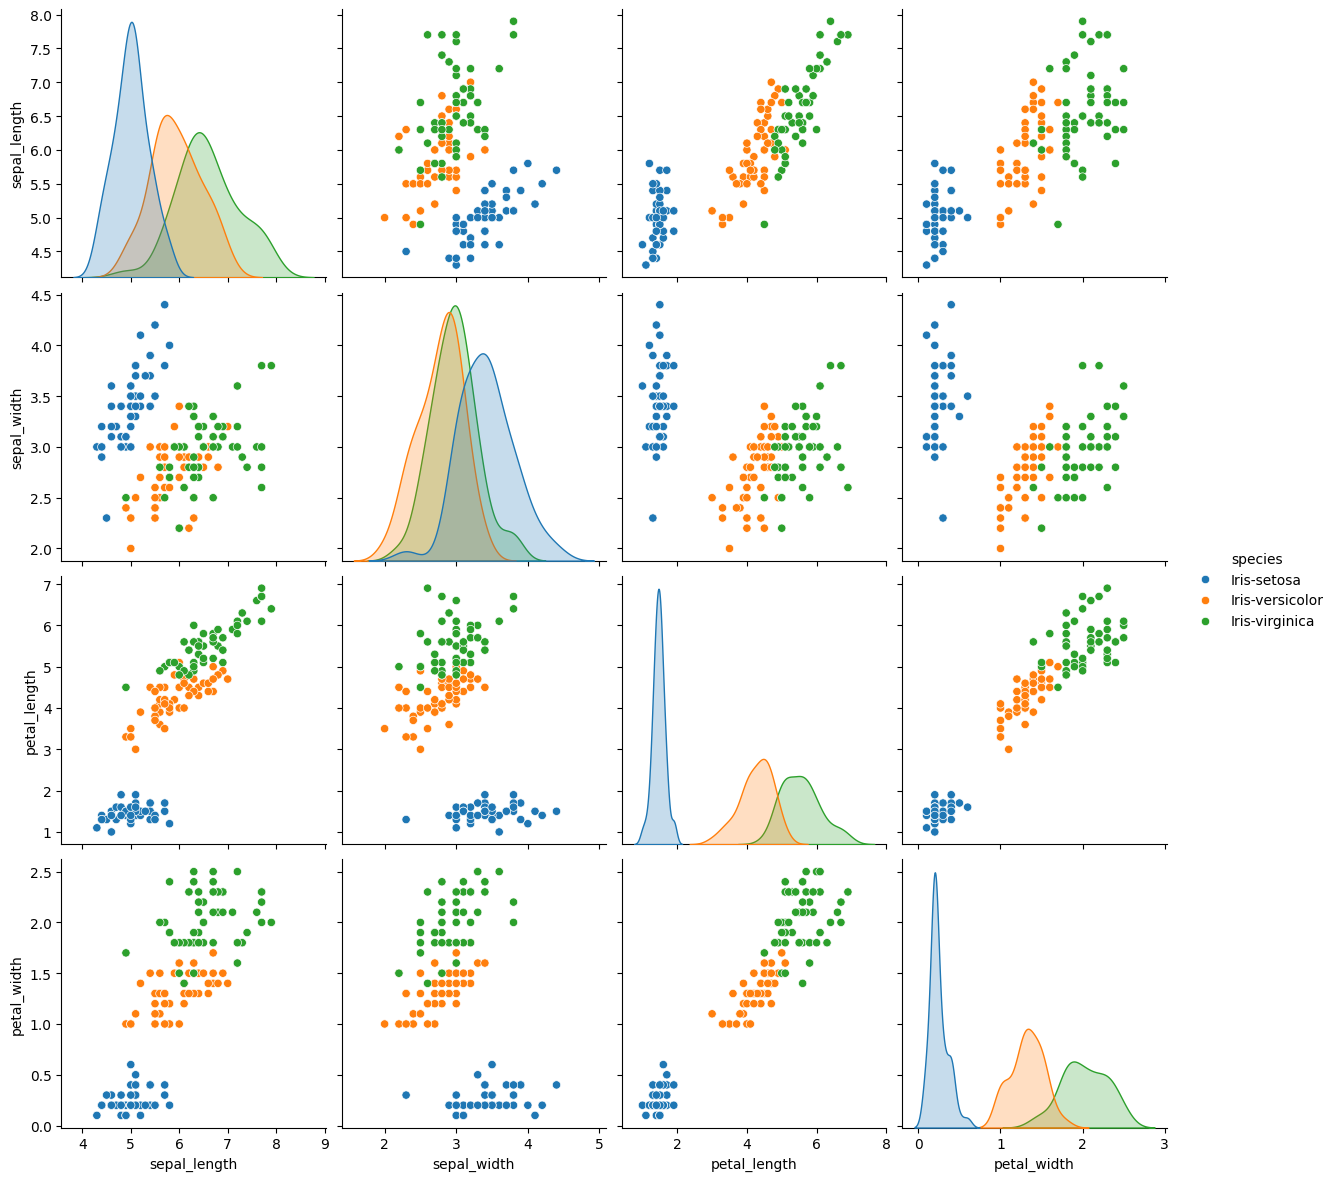

In [57]:
sns.pairplot(data, hue= 'species', height= 3)
plt.show()

### Box Plot

Next, we have the **box plot**. This graph is useful for seeing the distribution of the data. Often, you will also find your professor using a box plot to visualize the distribution of test scores.

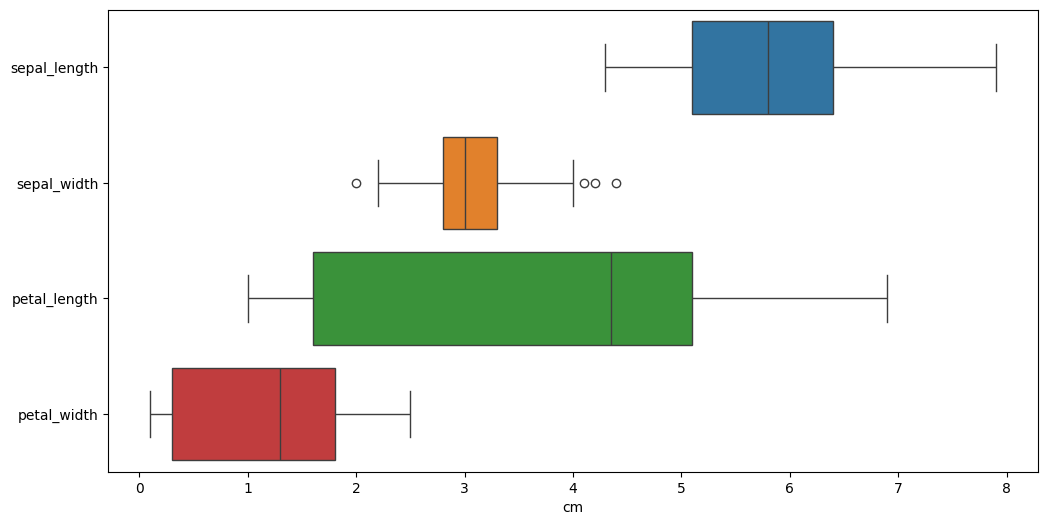

In [58]:
plt.figure(figsize=(12, 6))
sns.boxplot(data = data, orient= 'h')
plt.xlabel("cm")
plt.show()

### Violin Plot
<a id = "nn"></a>

Who doesn't like violins! (and boxes). This plot is a hybrid of the box plot and the kernal-density plot. Like the box plot, it visualizes the distribution of data, while using curves to demonstrate the frequency of data in each region.

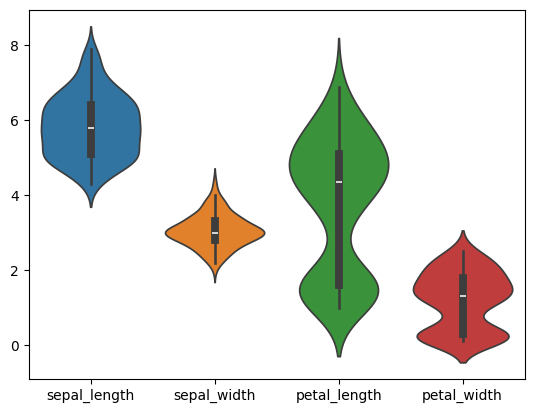

In [84]:
# violin plot
violin = sns.violinplot(data = data)
plt.show()

## Coding the Neural Network

The neural network in this tutorial is a simple multilayer perceptron network with an input layer, one hidden layer, and output layer. As we've discussed previously, there's four inputs and three outputs. This means our input layer will have four neurons, and our output layer will have three neurons. Typically in large scale models, several hidden layers are used, but for this small data set, we only need one hidden layer with two neurons.

In [87]:
class NeuralNetwork:
    # __init__ is a special function name that is automatically ran when the class is called upon. In this function, we want to set up the variables, weights, and biases.

    def __init__(self, n_input, n_hidden, n_outputs, learning_rate):
        #setting a seed ensures reproducibility, so the random initialized values will be the same every time
        np.random.seed(3)

        #declaring self to use later
        self.n_input = n_input
        self.n_hidden = n_hidden
        self.n_outputs = n_outputs 
        self.learning_rate = learning_rate
        

        #random value declaration format: {output, input}
        #initial randomized values before training for weights and biases, since we have a hidden layer, we must append twice
        self.weights = []
        self.weights.append(np.random.randn(self.n_hidden, self.n_input))
        self.weights.append(np.random.randn(self.n_outputs, self.n_hidden))
        
        self.biases = []
        self.biases.append(np.random.randn(self.n_hidden))
        self.biases.append(np.random.randn(self.n_outputs))

    # sigmoid is the activation function we will be using. an activation function is used to introduce non-linearity to our model, as well as bounded outputs. basically this just enables the model to be more complex
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    # derivative of activation function is needed to calculate the gradients later. a gradient is the measure of how much the output changes with respect to the input
    def dsigmoid(self, x):
        return x * (1 - x)

    # dot product to calculate output
    def make_prediction(self, input_vector):
        hidden_layer = self.sigmoid(np.dot(self.weights[0], input_vector) + self.biases[0])
        output_layer = self.sigmoid(np.dot(self.weights[1], hidden_layer) + self.biases[1])
        return output_layer

    # this is a crucial component of the neural network process. it consists of a forward pass, calculating gradients, and then backpropagation. backpropagation is the building block of modern neural networks. it essentially
    # allows the model to train itself by tweaking the weights and biases based off the output and going backwards until reaching the input
    def gradient_descent(self, input_vector, target):
        # Forward pass
        hidden_layer = self.sigmoid(np.dot(self.weights[0], input_vector) + self.biases[0])
        output_layer = self.sigmoid(np.dot(self.weights[1], hidden_layer) + self.biases[1])
        
        # Calculate error, which is needed to calculate the derivative of the error
        error = output_layer - target
        
        # Derivatives of error used to find gradients using chain rule. we use derivatives to find the gradients needed for training
        derror_doutput = error * self.dsigmoid(output_layer)
        doutput_dhidden = np.dot(self.weights[1].T, derror_doutput) * self.dsigmoid(hidden_layer)

        # Calculate gradients using outer multiplication and derivatives
        derror_dweights1 = np.outer(derror_doutput, hidden_layer)
        derror_dbias1 = derror_doutput
        derror_dweights0 = np.outer(doutput_dhidden, input_vector)
        derror_dbias0 = doutput_dhidden

        return [derror_dweights0, derror_dweights1], [derror_dbias0, derror_dbias1]

    #second half of backpropagation, updating weights and biases according to gradients
    def update(self, gradients, biases):
        self.weights[0] -= self.learning_rate * gradients[0]
        self.weights[1] -= self.learning_rate * gradients[1]
        self.biases[0] -= self.learning_rate * biases[0]
        self.biases[1] -= self.learning_rate * biases[1]

    #this function serves to train the model, while also keeping track of all errors so we can plot it later and analyze the results
    def train(self, input_vectors, targets, iterations):
        all_errors = []
        for current_iteration in range(iterations):

            # Pick a random data point
            random_index = np.random.randint(len(input_vectors))
            input_vector = input_vectors[random_index]
            target = targets[random_index]

            # Compute gradients using backpropagation
            gradients, biases = self.gradient_descent(input_vector, target)

            # Update weights and biases
            self.update(gradients, biases)

            # Calculate cumulative error for monitoring
            if current_iteration % 100 == 0: #for every 100 epochs, it calculates the error and appends it to the cumulative error
                cumulative_error = 0
                for i in range(len(input_vectors)):
                    data_point = input_vectors[i]
                    target = targets[i]

                    # error is calculated using RMS, root mean square
                    error = np.square(self.make_prediction(data_point) - target)
                    cumulative_error += error
                
                #this appends all the cumulative errors to the total error (all_errors)
                all_errors.append(np.sum(cumulative_error))

        return all_errors

<br>

After building the neural network, we need to initialize it with the proper number of neurons for each layer. This also means we need to declare the **learning rate**.
- The learning rate is a hyperparameter that determines how much the weights change in regards to optimization. Basically, it is just a fraction for updating the weights. The smaller the learning rate, the smaller the increments.

In [60]:
# Initialize neural network
n_input = 4
n_hidden = 2
n_outputs = 3
learning_rate = 0.1
neural_network = NeuralNetwork(n_input=n_input, n_hidden=n_hidden, n_outputs=n_outputs, learning_rate=learning_rate)

<a id = "re"></a>

<br>
Now train the neural network. We already created the training function inside the neural network class, so all we need to do now is call upon it. Epoch is another term for iterations, so let's declare the number of iterations to train the model.

In [61]:
# Train neural network
epoch = 10000
errors = neural_network.train(X_train, y_train, epoch)

<br>
Additionally, we coded the training function to keep track and return a list of all the cumulative errors every 100 epochs. The reason we did this was so we can visualize the error over time in our discussion for results.

## Discussion of Results

After successfully training and testing the model, we can now analyze the results and what they mean for our performance. There are a few important metrics to discuss in regards to error, and this is where sklearn can come in handy again.

### Error over Iterations

First, we can look at the error over iteration plot we coded earlier in the neural network. By plotting the error returned by the training function, we can examine how the training model process went.

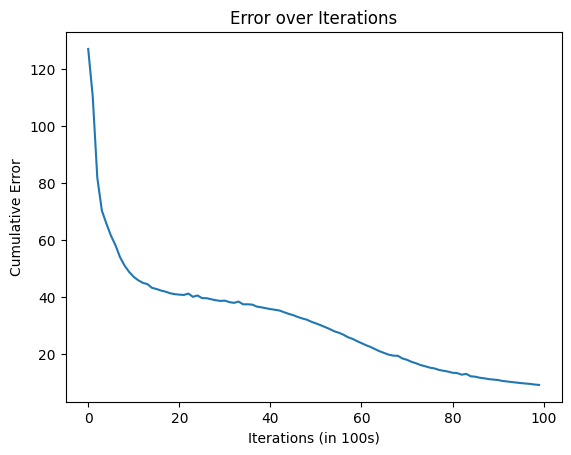

In [62]:
# Plot error over iterations
plt.plot(errors)
plt.xlabel("Iterations (in 100s)")
plt.ylabel("Cumulative Error")
plt.title("Error over Iterations")
plt.show()

<br>
As we can see, as the number of iterations increased, the cumulative error dropped significantly. Especially during the first 20 iterations, we can see the error dropped exponentially as the model was being trained. Notice the error plummets from 120, a value above 100, because the y axis is not measuring error percentage. Instead, it is using root square error, indicating the error range of our initialized values.

### Accuracy Percentage

Using one of the imports: **from sklearn.metrics import accuracy_score**, we can easily calculate the accuracy of our model after training. First, create a for loop that loops through the length of the testing data. For each iteration, call upon the make_prediction method in the neural network we coded, and append it to a list.

After that, we need to use np.argmax to decode the data. Recall from the one-hot encoding that transformed our species names into vectors [1, 0, 0], [0, 1, 0], and [0, 0, 1]. Now we must reverse that process and get 0s, 1s, and 2s again. This is necessary for using the accuracy score metric.

In [63]:
# Evaluate neural network on test set
y_pred = []
for i in range(len(X_test)):
    prediction = neural_network.make_prediction(X_test[i])
    y_pred.append(np.argmax(prediction))

y_test_labels = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_test_labels, y_pred)
print(f"Accuracy on test set: {accuracy * 100:.2f}%")

Accuracy on test set: 100.00%


### Confusion Matrix

A confusion matrix is a table used to evaluate the performance of my classification model. It provides a detailed breakdown of the actual versus predicted classifications, allowing us to see where the model is making correct and incorrect predictions. An ideal confusion matrix will only have features in the diagonal. To plot the confusion matrix, I used a heatmap.

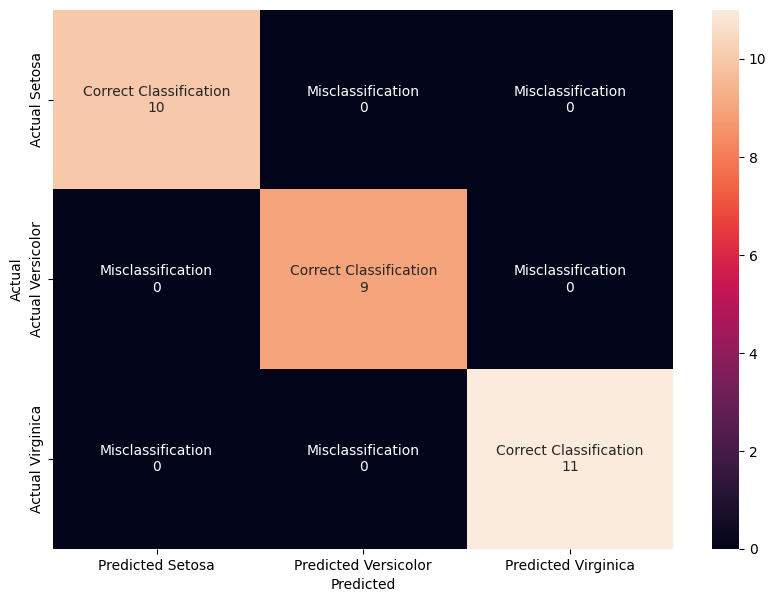

In [64]:
# Confusion matrix
cf_matrix = confusion_matrix(y_test_labels, y_pred)

# Labels for the confusion matrix heatmap
labels = ['Correct Classification', 'Misclassification', 'Misclassification', 
          'Misclassification', 'Correct Classification', 'Misclassification', 
          'Misclassification', 'Misclassification', 'Correct Classification']
values = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
annotations = [f'{v1}\n{v2}' for v1, v2 in zip(labels, values)]
annotations = np.asarray(annotations).reshape(3, 3)

# Axis labels for heatmap
axxlabels = ['Predicted Setosa', 'Predicted Versicolor', 'Predicted Virginica']
axylabels = ['Actual Setosa', 'Actual Versicolor', 'Actual Virginica']

# Plotting the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cf_matrix, annot=annotations, fmt='', xticklabels=axxlabels, yticklabels=axylabels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

As we can see, the confusion matrix of my neural network demonstrates 100% accuracy. There are zero misclassifications, and all instances of Setosa, Virginica, and Versicolor are correctly identified. In total, 30 entrees were tested, with the other 120 used for training. Notice the sum of all of the correct classifications is indeed 30, which correlates to the 100% accuracy.

### Classification Report

The classification report is another way of analyzing the deep learning behavior. It provides key metrics that evaluate the performance of the model, such as: precision, recall, and F1-score for each class, along with the overall accuracy.

In [65]:
# Classification report
target_names = ['setosa', 'versicolor', 'virginica']
print(classification_report(y_test_labels, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



#### Overall Metrics
- **Accuracy** is the ratio of correct to incorrect classifications. Our accuracy score is 1.00, indicating 100% accuracy

#### Per-Class Metrics
- **Precision** is the ratio of correctly predicted positives to the expected number of positives
- **Recall** is basically the sensitivity of the model. 1.00 means every instance of each class was correctly identified
- **F1-Score** is the weighted average of precision and recall. 1.00 means the model has perfect precision and recall (yay!)
- **Support** is just the number of instances of each species we identified

### Aggregate Metrics
- **Macro Avg** is the average of precision, recall, and F1-score. Since all of them are perfect, our macro average is naturally 1.00
- **Weighted Avg** is just macro average with the support taken into consideration

## Congratulations on finishing the tutorial!